In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Etapa 2

<bound method NDFrame.head of                  Diagnosis Age  Fraction Genome Altered  Longest Dimension  \
Sample ID                                                                    
TCGA-05-4244-01           70.0                   0.4565           1.100000   
TCGA-05-4249-01           67.0                   0.2221           1.400000   
TCGA-05-4250-01           79.0                   0.2362           1.200000   
TCGA-05-4382-01           68.0                   0.0854           0.900000   
TCGA-05-4384-01           66.0                   0.0661           0.800000   
...                        ...                      ...                ...   
TCGA-NJ-A55O-01           56.0                   0.0194           1.183831   
TCGA-NJ-A55R-01           67.0                   0.0760           1.183831   
TCGA-NJ-A7XG-01           49.0                   0.4205           1.183831   
TCGA-O1-A52J-01           74.0                   0.5443           1.183831   
TCGA-S2-AA1A-01           68.0    

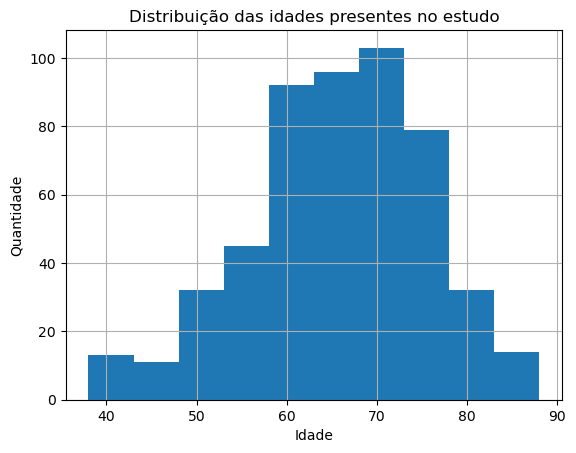

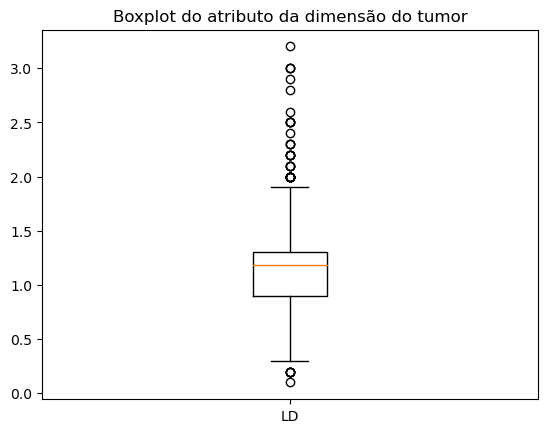

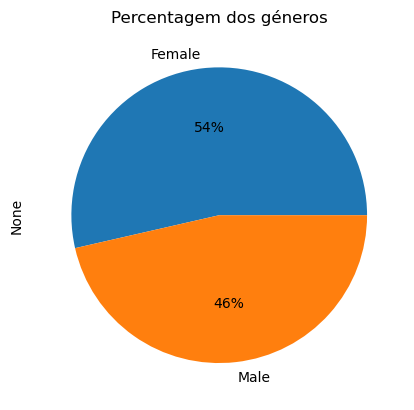

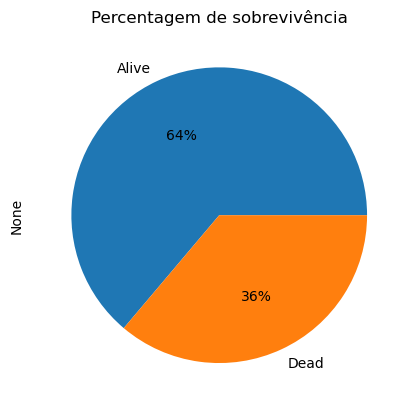

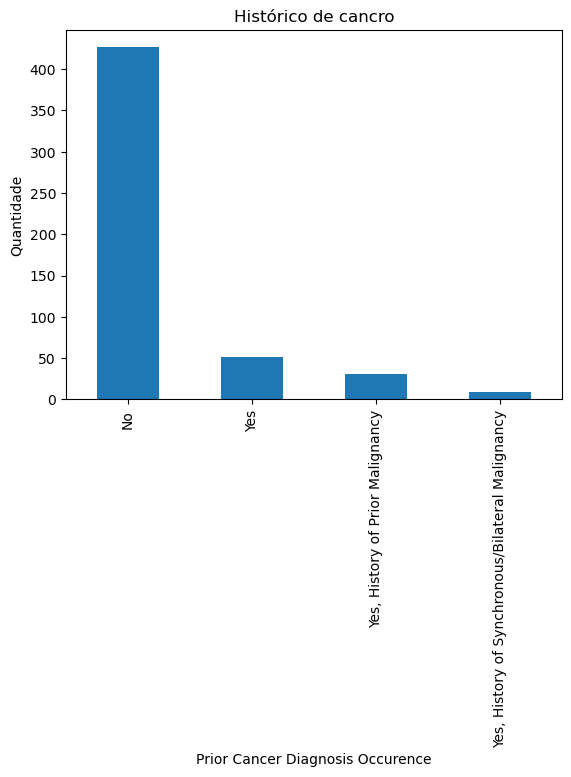

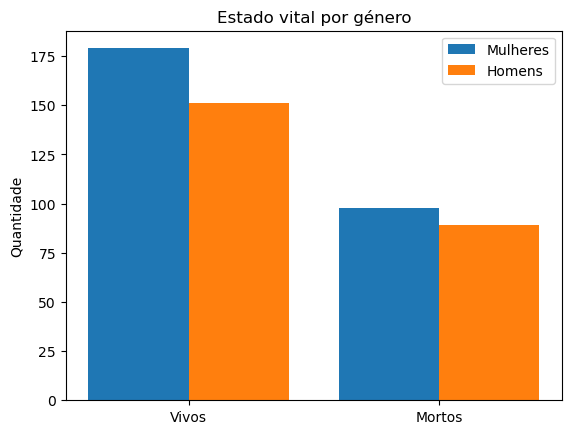

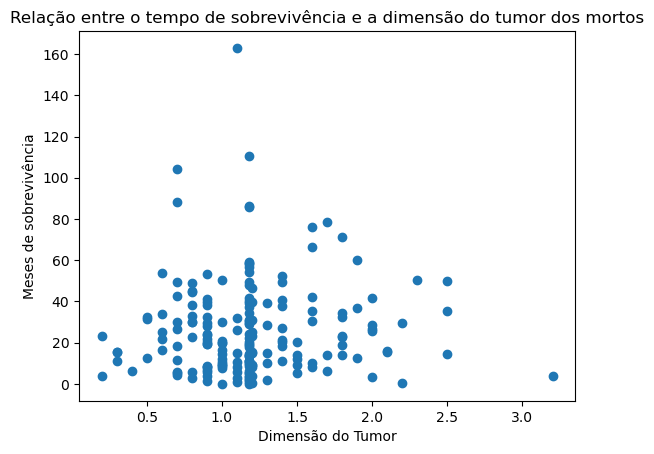

In [4]:
%run \Users\jfpal\Downloads\Trabalho\etapa1.ipynb

In [11]:
# análise dos genes
data_hugo_luad.transpose().describe()

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.019793,12.563599,13.772414,109.191745,921.412556,0.000518,200.965270,0.456712,0.144994,0.0,...,48.018296,383.145637,1082.626088,61.012445,849.987180,4049.562512,1080.205735,710.462033,127.999331,0.176634
std,0.110964,10.824164,11.507095,54.083375,362.542965,0.011769,156.827547,0.605640,1.625181,0.0,...,21.424549,169.977557,339.329517,74.516301,259.159593,1869.604727,440.005370,319.317913,251.016470,0.896453
min,0.000000,0.000000,0.000000,36.357000,270.115400,0.000000,11.022000,0.000000,0.000000,0.0,...,8.879000,34.099400,311.314600,0.000000,264.413200,446.043200,183.841200,219.603600,0.685400,0.000000
25%,0.000000,5.357900,5.888000,78.785300,671.334600,0.000000,89.459200,0.000000,0.000000,0.0,...,34.482800,276.152700,851.610700,5.879200,675.758400,2650.125500,776.395500,548.513500,10.759700,0.000000
50%,0.000000,10.456700,11.282000,97.173100,848.939700,0.000000,160.488400,0.305600,0.000000,0.0,...,44.308600,346.751700,1040.429600,37.424400,815.834800,3811.870500,1033.582100,663.253200,25.665900,0.000000
75%,0.000000,16.079700,17.981600,122.073800,1072.048400,0.000000,269.594000,0.746300,0.000000,0.0,...,58.514100,463.612700,1257.618600,86.475300,978.162000,5176.296700,1339.449500,807.746300,128.659200,0.000000
max,1.328100,84.739200,107.370500,677.255900,2678.614800,0.267600,1477.014100,5.281000,33.737500,0.0,...,217.434200,1749.691600,3016.414100,472.129300,2453.159500,15291.709300,2811.271300,4961.792200,2692.689000,13.407300


# Análise Univariada

A análise univariada inclui todos os métodos de Estatística Descritiva que permite a análise de cada variável separadamente e também métodos de Estatística Inferencial para uma determinada variável.

In [5]:
# obter apenas a matriz dos valores
data = data_hugo_luad.transpose().values
#data = data_hugo_luad.values
print(data.shape)

(517, 20529)


In [9]:
print('Dados originais')
# variância
variances = data.var(axis = 0) # calcula a variância de cada gene
# print(variances.shape)
medvar = variances.mean() # faz a média de todos
print('Var:', medvar)
# desvio padrão
std = data.std()
medstd = std.mean()
print('Std:', medstd)

Dados originais
Var: 14004342.851514589
Std: 5100.288514458408


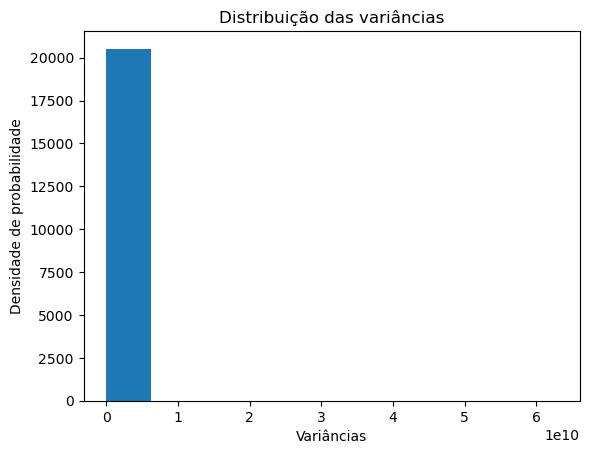

In [10]:
plt.hist(variances, bins = 10)
plt.xlabel('Variâncias')
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição das variâncias')
plt.show()

Observando o gráfico representado verifica-se que é um gráfico  assimétrico à esquerda. Existe um pico no intervalo de variância de 0 a 0.5 que são os valores mais comuns de variância para a densidade de probabilidade.

In [13]:
# Este filtro permite fazer a redução da dimensionalidade do dataset
# Remove features com reduzida variância
sel = VarianceThreshold(threshold= medvar*3)
input_filt = sel.fit_transform(data)
print(input_filt.shape)
# Reduziu a quantidade de genes de 20k para 306 apenas
# print(input_filt)
# como saber que 306 genes são?

(517, 306)


In [14]:
print('Novos dados')
# variância
variances = input_filt.var(axis = 0)
medvar = variances.mean()
print('Var:', medvar)
# desvio padrão
std_new = input_filt.std()
print('Std:',std_new)

Novos dados
Var: 889978068.7234744
Std: 36245.131712638205


Tanto a variâncias quanto o desvio padrão aumentaram significativamente.
Tendo em conta que o presente estudo apresenta um conjunto de dados relativos a pacientes com cancro do pulmão, o objetivo é compreender quais os genes que mais influenciam o atributo patient’s vital status. Assim, é importante que os genes com baixa variância sejam eliminados porque uma baixa variância significa que os atributos são muito semelhantes e, neste caso, não contribuem para a conclusão procurada. Por outro lado, os dados com elevada variância mantêm-se tendo em conta que uma elevada variância significa que existem diferentes valores do gene e o que permite tecer conclusões em relação ao atributo patient’s vital status.

In [15]:
# Análise de variância simples, t-teste
# fclassif - ANOVA ou t-test (neste caso t-test pois estado vital tem apenas duas classes)
new_data = data_hugo_luad.transpose()

# genes diferencialmente expressos
# seleciona genes com menor p-value (os 10% com menor valor)
selector = SelectPercentile(f_classif, percentile=10)

# metadados do estado vital
output_status = new_meta.values[:,-1]

selector.fit_transform(new_data, output_status)
genes_status = np.where(selector.pvalues_ <0.01)
print(len(new_data.columns[genes_status]))
print(new_data.columns[genes_status])

1835
Index(['RNU12-2P', 'A2M', 'AAMP', 'ABCA2', 'HSA275973', 'ABCA6', 'ABCC2',
       'ABCD1', 'ABCD2', 'ABCE1',
       ...
       'ZNF836', 'ZNF844', 'LOC641907', 'ZNRF3', 'ZP3', 'ZSWIM3', 'ZWILCH',
       'ZWINT', 'LOC100130182', 'FLJ10821'],
      dtype='object', name='Hugo_Symbol', length=1835)


C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    9    15    23  1624  1749  3526  3527  4318  4375  4639  4655  4807
  4809  4811  4814  4815  4816  4817  4819  4822  4829  4831  4834  5288
  7661  7662  7663  7664  7665  9304  9306  9309  9314  9316  9320  9321
  9323  9350  9351  9452  9830 10121 10295 11957 12372 12381 12386 12478
 12489 12503 12514 12521 12544 12552 12554 12556 12558 12579 12621 12626
 12627 12629 12637 12643 12645 12653 12654 12663 12667 12671 12681 12682
 12688 12690 12717 12720 12721 12723 12733 13465 13519 13776 13990 14157
 14158 14160 15018 15137 15139 15140 15445 16565 16566 16567 16568 16570
 16571 16573 16574 16577 16578 16579 16603 16633 16676 16696 16698 16699
 16700 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712
 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724
 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736
 16

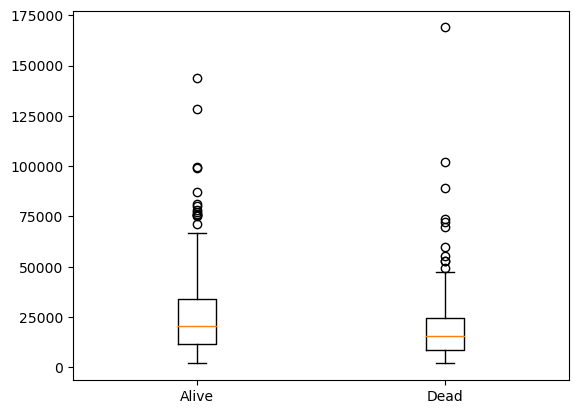

In [16]:
# analisar o gene A2M relacionado com status
data_gene = new_data.loc[:,'A2M']
#print(data_gene)

data_alive = data_gene[new_meta["Patient's Vital Status"]=='Alive']
data_dead = data_gene[new_meta["Patient's Vital Status"]=='Dead']

both = [data_alive, data_dead]
plt.boxplot(both)
plt.xticks([1,2], ['Alive', 'Dead'])
plt.show()

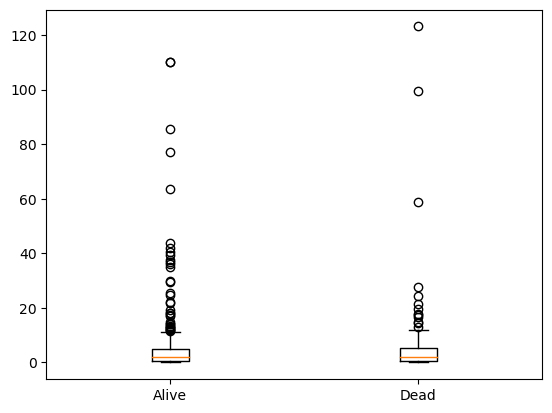

In [66]:
# analisar o gene TP53AIP1 relacionado com status
data_gene = new_data.loc[:,'TP53AIP1']
#print(data_gene)

data_alive = data_gene[new_meta["Patient's Vital Status"]=='Alive']
data_dead = data_gene[new_meta["Patient's Vital Status"]=='Dead']

both = [data_alive, data_dead]
plt.boxplot(both)
plt.xticks([1,2], ['Alive', 'Dead'])
plt.show()

In [17]:
output = new_meta.values[:,5]
selector.fit_transform(new_data, output)
genes_sex = np.where(selector.pvalues_ <0.01)
print(len(new_data.columns[genes_sex]))
print(new_data.columns[genes_sex])

1625
Index(['A1CF', 'AAGAB', 'ABCB6', 'ABCC12', 'ABCC2', 'ABCC9', 'LOC654057',
       'ABI1', 'FLJ21551', 'ABLIM1',
       ...
       'ZNF823', 'ZNF843', 'ZNF846', 'ZNF879', 'ZRSR2', 'ZSCAN23', 'LOC90393',
       'ZWILCH', 'ZWINT', 'ZZZ3'],
      dtype='object', name='Hugo_Symbol', length=1625)


C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    9    15    23  1624  1749  3526  3527  4318  4375  4639  4655  4807
  4809  4811  4814  4815  4816  4817  4819  4822  4829  4831  4834  5288
  7661  7662  7663  7664  7665  9304  9306  9309  9314  9316  9320  9321
  9323  9350  9351  9452  9830 10121 10295 11957 12372 12381 12386 12478
 12489 12503 12514 12521 12544 12552 12554 12556 12558 12579 12621 12626
 12627 12629 12637 12643 12645 12653 12654 12663 12667 12671 12681 12682
 12688 12690 12717 12720 12721 12723 12733 13465 13519 13776 13990 14157
 14158 14160 15018 15137 15139 15140 15445 16565 16566 16567 16568 16570
 16571 16573 16574 16577 16578 16579 16603 16633 16676 16696 16698 16699
 16700 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712
 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724
 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736
 16

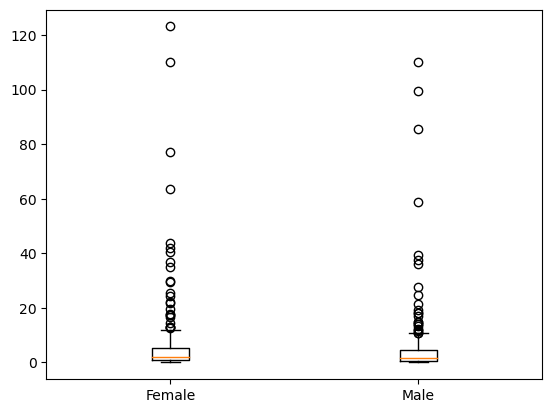

In [75]:
# analisar o gene TP53AIP1 relacionado com sexo
data_gene = new_data.loc[:,'TP53AIP1']

data_female = data_gene[new_meta['Sex']=='Female']
data_male = data_gene[new_meta['Sex']=='Male']

both = [data_female, data_male]
plt.boxplot(both)
plt.xticks([1,2], ['Female', 'Male'])
plt.show()

De forma a estudar alguns dos genes resultantes do filtro de forma mais pormenorizada, realizaram-se os gráficos apresentados acima. O primeiro analisa o gene A2M, relacionando-o com o atributo patient’s vital status. O segundo relaciona o gene TP53AIP1 com o mesmo atributo e, por fim, o terceiro gráfico representa a relação entre o gene TP53AIP1 e o atributo sex. Através do primeiro gráfico verifica-se a existência de alguns outliers. No entanto, é possível observar-se que alguns dados foram agrupados de acordo com o estado do paciente o que significa que alguns dados têm semelhança. Por outro lado, o segundo e terceiro gráfico apresentam uma grande quantidade de outliers e, por isso, pode-se inferir que os dados não podem ser agrupados por semelhança o que permite concluir que este gene não condiciona o estado vital do paciente, seja para homens ou para mulheres.

# Análise Multivariada não supervisionada

A análise multivariada inclui os métodos de análise das relações de múltiplas variàveis dependentes e/ou independentes, que se estabeleçam ou não relações de causa/efeito entre os dois grupos. Só os métodos de Estatística Multivariada permitem que se explore a performance conjunta das variáveis e se determine a influência ou importância de cada uma, estando as restantes presentes.

In [6]:
# pré-processamento: standardizacao dos dados
input_sc = preprocessing.scale(data)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())
# Center to the mean and component wise scale to unit variance.

Media:  6.555461494686905e-18
Desvio padrao:  0.9917581348110315


### PCA

In [7]:
# PCA - principal component analysis
pca = PCA(n_components=50)
X_r = pca.fit(input_sc).transform(input_sc)
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Var. explicada: [0.06064285 0.04822626 0.04343661 0.03252856 0.02852408 0.02084128
 0.01832875 0.01708562 0.01347181 0.01237595 0.01135451 0.01081352
 0.01003048 0.00931353 0.00841317 0.007897   0.00773555 0.00746694
 0.00709084 0.00690063 0.00652401 0.00635544 0.00611868 0.00589678
 0.00587245 0.00556894 0.00553916 0.00538364 0.00524417 0.00519481
 0.00500894 0.00498133 0.00488912 0.00481398 0.00473202 0.00456567
 0.00452155 0.00441849 0.00431843 0.00430971 0.00415424 0.00411104
 0.00409726 0.00399124 0.00395918 0.00389064 0.00376565 0.00373749
 0.00360814 0.00357132]


0.5256214580866883

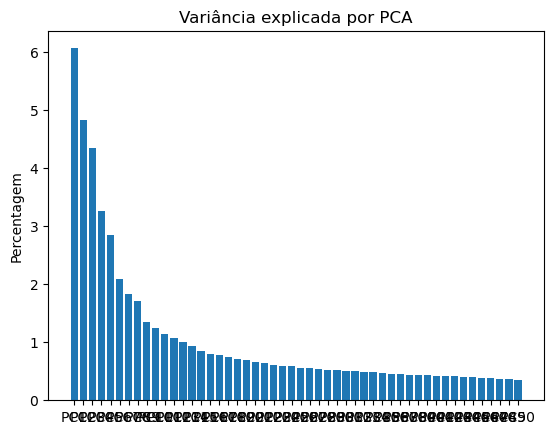

In [8]:
n = 50
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

Na análise PCA, fez-se o teste com vários valores diferentes de componentes. Apenas selecionando 50 ou mais componentes é que se tornou possível obter uma variância superior a 50%.
Pela observação do gráfico, pode verificar-se que nos componentes iniciais há uma maior concentração das variâncias, o que significa que há maior dipersão dos dados e, por isso, maior informação neles contida.

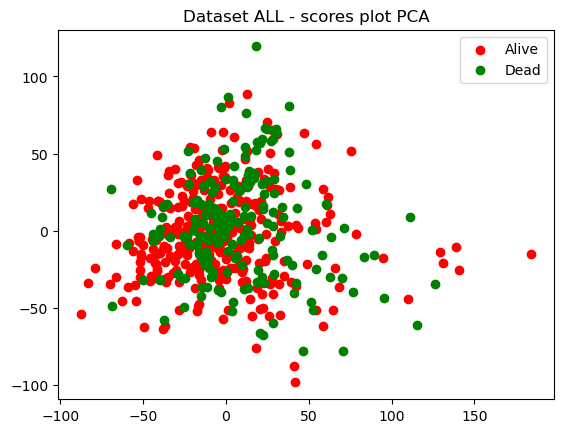

In [9]:
output_status = new_meta.values[:,-1]
#print(output_status)
plt.figure()
for c, name in zip("rgb", ["Alive", "Dead"]):
    plt.scatter(X_r[output_status == name, 0], X_r[output_status == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

Relativamente ao presente gráfico, denota-se uma vigorosa dispersão na prestação dos atributos Alive e Dead. Paralelamente, verifica-se uma sobreposição para a combinação de valores destes dois atributos, o que impede uma análise concisa.

### Dendograma

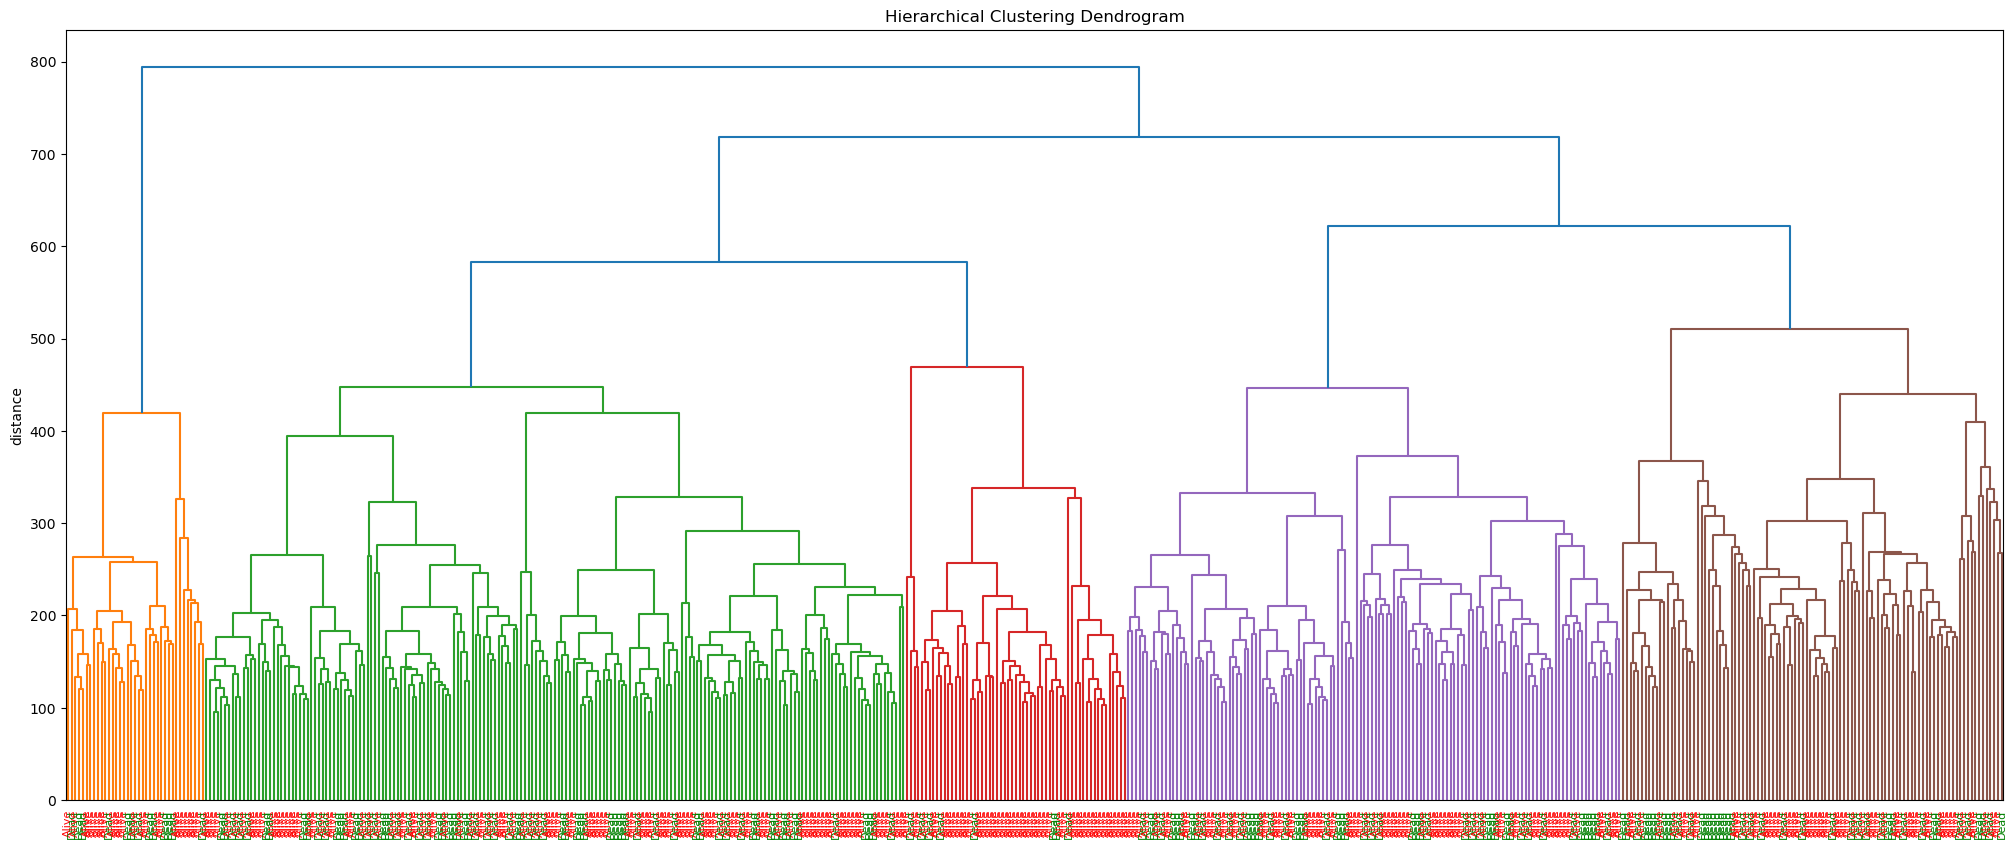

In [10]:
# Dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(input_sc, method='ward', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(new_meta.iloc[:,-1]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'Alive': 'r', 'Dead': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

### Método do cotovelo

C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


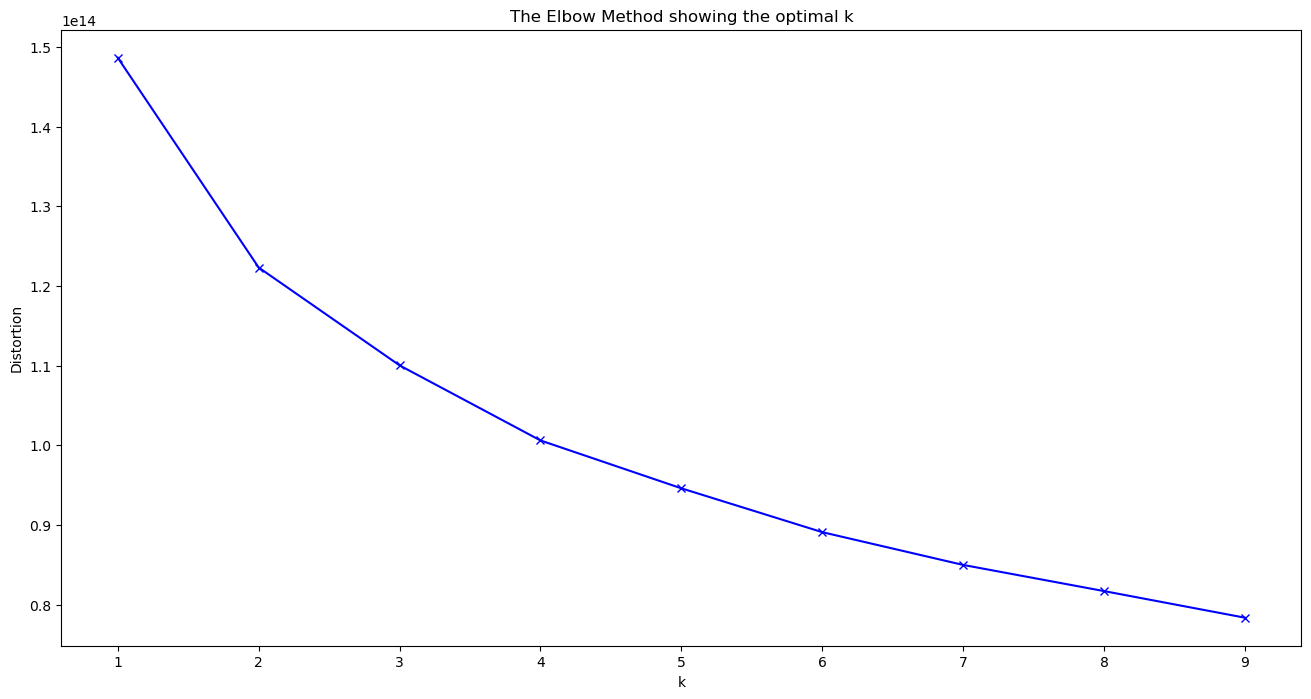

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Os métodos de clustering tem como parâmetro inicial a atribuição da quantidade de clusters a formar.
Desta forma, recorreu-se ao método do cotovelo que tem como objetivo definir qual o número ideal de clusters que permite agrupar os dados da melhor forma.
Observando o gráfico, verifica-se que o cotovelo se encontra em k = 2, sendo este o valor escolhido para inicializar os algorimtos seguintes.

### Clustering Hierárquico

In [12]:
# clustering hierárquico
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(input_sc)

AgglomerativeClustering()

In [13]:
# relacionar com alive e dead
res_hc = hclust.labels_
pd.crosstab(output_status, res_hc)

col_0,0,1
row_0,,
Alive,306,24
Dead,174,13


In [14]:
# relacionar com o sexo
sex = new_meta.values[:,5]  
res_hc = hclust.labels_
pd.crosstab(sex, res_hc)

col_0,0,1
row_0,,
Female,256,21
Male,224,16


Utilizando affinity = ‘euclidean’ e linkage=‘ward’ efetuaram-se duas tabelas que permitem dividir os dados em dois clusters distintos. Em ambas as tabelas verifica-se que existe um cluster que contém um maior número de dados. Assim, pode-se concluir que esses dados têm atributos semelhantes.

### K-Means

O método do KMeans tem como objetivo agrupar os dados de acordo com a sua proximidade a um centróide, num determinado número de clusters definidos pelo utilizador.

In [15]:
# k-means
kmeans_est = KMeans(init='random', n_clusters=2, n_init = 100)
res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

In [16]:
# relacionar com alive e dead
pd.crosstab(output_status, res_kmeans)

col_0,0,1
row_0,,
Alive,36,294
Dead,27,160


In [17]:
# relacionar com o sexo
pd.crosstab(sex, res_kmeans)

col_0,0,1
row_0,,
Female,33,244
Male,30,210


Na aplicação do K-Means, os dados foram relacionados com o status do paciente e com o sexo.
Em ambas as tabelas formadas, um dos clusters contém significativamente mais dados do que o outro. Este método de clustering é não determinístico, podendo apresentar resultados diferentes sempre que o código é executado.

# Dúvidas

1. Como escolhemos qual dos métodos de redução de dados é o mais indicado para os nossos dados?
2. A partir do momento em que reduzimos os dados usamos sempre os reduzidos?
3. Como interpretar as tabelas dos clusters?
4. Como sabemos que modelos escolher para a terceira etapa?
5. As conclusões finais do trabalho é sobre os genes em concreto que influenciam o cancro como no estudo que nos enviou ou sobre os modelos da última etapa?